 make some mock square gauge images from rectangular gauge block images  
 should be able to do this with a  
 rotate to square gauge to image edge  
 a scale along width  
 reverse the rotation  

 use `plot_helpers.rotate` which also returns the gauge corners rotated the same as image  


In [48]:
from PIL import Image, ImageDraw, ImageFilter
import numpy as np
import matplotlib.pyplot as plt

In [49]:
from ls_fringeapp import fringeprocess as fp
from ls_fringeapp.load_equipment_data import repo_folder

In [50]:
from plot_helpers import draw_gauge, rotate

In [51]:
out_image_folder = repo_folder / "tests" / "data" / "mock_square_gauges"
to_process = repo_folder / "tests" / "data" / "Platen03" / "cropped" / "fflog.txt"

In [52]:
d2 = np.genfromtxt(
    to_process,
    delimiter="\t",
    dtype=None,
    usecols=(0, 1, 2, 3, 4, 5, 6, 7),
    unpack=True,
)
ffracs = np.array(d2[0])
fns = d2[1]
xys = np.array(d2[2:8]).T

ffracs[0], fns[0], xys[0]


(np.float64(0.256637),
 np.str_('MSL-03_01-G.bmp'),
 array([   7.8047,  109.37  , 1023.7   ,  178.58  ,  996.06  ,  413.88  ]))

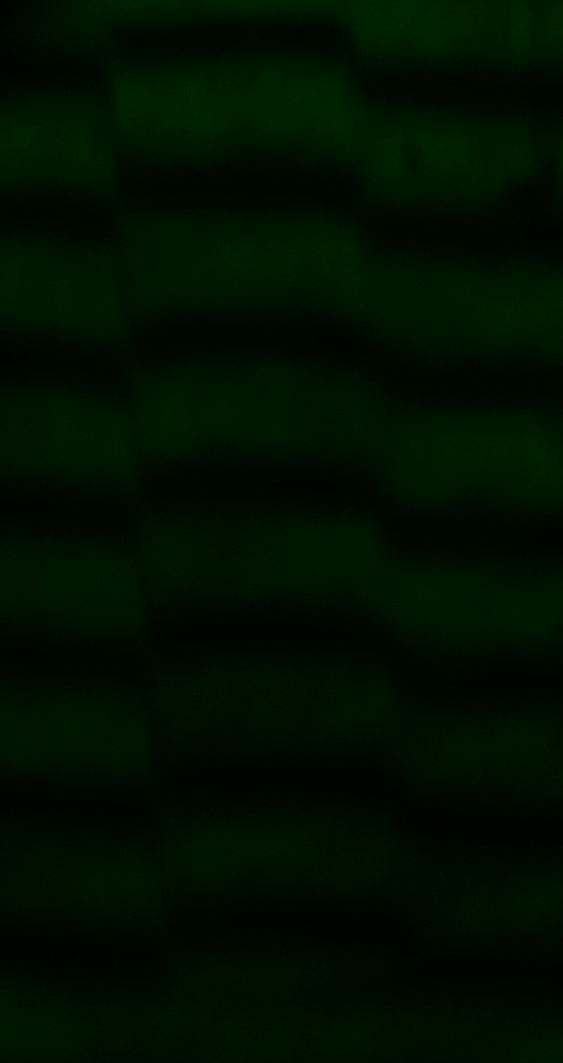

In [53]:
index = 0
img_filename = to_process.parent / fns[index]
img = Image.open(img_filename)
img

In [54]:
f"{img.size=}"

'img.size=(563, 1063)'

In [55]:
xygb = xys[index].reshape((3, 2))
xygb

array([[   7.8047,  109.37  ],
       [1023.7   ,  178.58  ],
       [ 996.06  ,  413.88  ]])

In [56]:
img = img.convert("L")
img_array = np.asarray(img)
img_array.shape

(1063, 563)

In [57]:
ffrac, drawdata = fp.array2frac(img_array, xygb, drawinfo=True)
ffrac, ffracs[index]

(np.float64(0.2554363953191499), np.float64(0.256637))

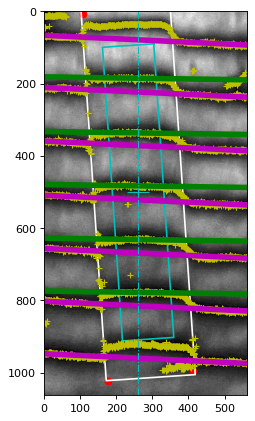

In [58]:
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
draw_gauge(axes, img_array, drawdata)

In [59]:
xy = xygb
length = ((xy[0, :] - xy[1, :]) ** 2).sum() ** 0.5
width = ((xy[1, :] - xy[2, :]) ** 2).sum() ** 0.5
scale = length / width
# angle of left hand edge to x-axis
phi = np.arctan2((xy[0, 1] - xy[1, 1]), (xy[0, 0] - xy[1, 0]))
length, width, np.rad2deg(phi)

(np.float64(1018.250109090144),
 np.float64(236.91783301389532),
 np.float64(-176.10262692198165))

In [60]:
xy

array([[   7.8047,  109.37  ],
       [1023.7   ,  178.58  ],
       [ 996.06  ,  413.88  ]])

In [61]:
pa = xy[:, [1, 0]]
pa

array([[ 109.37  ,    7.8047],
       [ 178.58  , 1023.7   ],
       [ 413.88  ,  996.06  ]])

In [62]:
# rotate gauge square to axis

img1, xy1 = rotate(img, angle=-180 - np.rad2deg(phi), expand=True, points=pa)


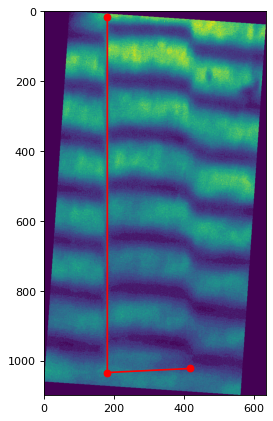

In [63]:
fig = plt.figure(figsize=(20, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.imshow(np.asarray(img1))
axes.axis("image")
axes.plot(xy1[:, 0], xy1[:, 1], "r-o")

In [64]:
xy1

array([[ 181.3634015 ,   15.3162014 ],
       [ 181.3634015 , 1033.56631049],
       [ 417.99792414, 1021.98346558]])

In [65]:
# scale along y
size = (int(scale * img1.size[0]), img1.size[1])
img2 = img1.resize(size)


In [66]:
S = np.array(((scale, 0), (0, 1)))
xy2 = np.dot(S, xy1.T).T
xy2

array([[ 779.48249404,   15.3162014 ],
       [ 779.48249404, 1033.56631049],
       [1796.51496232, 1021.98346558]])

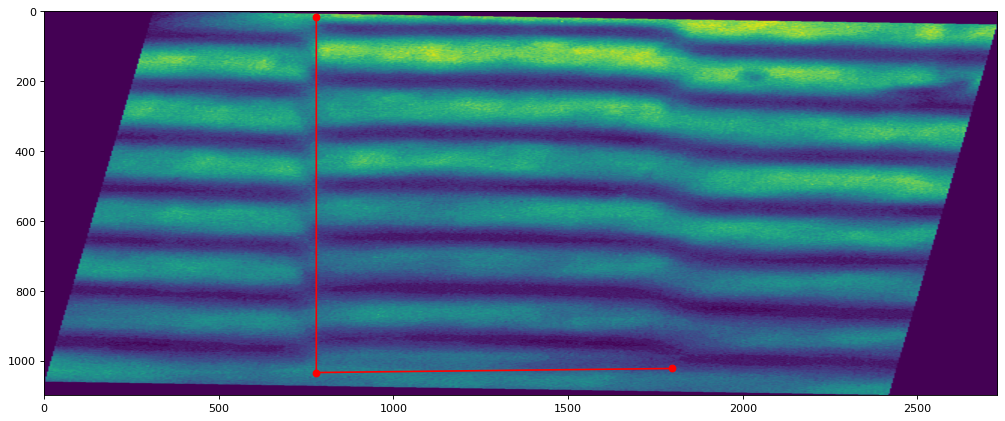

In [67]:
fig = plt.figure(figsize=(20, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.imshow(np.asarray(img2))
axes.axis("image")
axes.plot(xy2[:, 0], xy2[:, 1], "r-o")

In [69]:
# rotate back
img3, xy3 = rotate(img2, angle=180 + np.rad2deg(phi), expand=True, points=xy2)


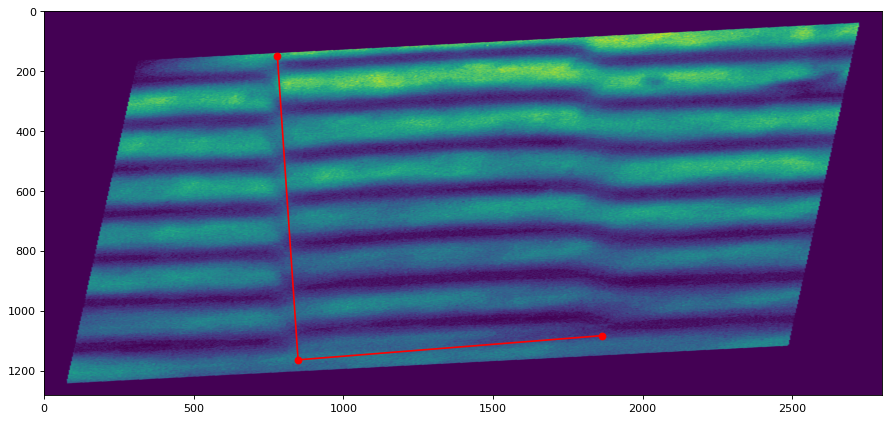

In [70]:
fig = plt.figure(figsize=(20, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.imshow(np.asarray(img3))
axes.axis("image")
axes.plot(xy3[:, 0], xy3[:, 1], "r-o")